In [5]:
import numpy as np

X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

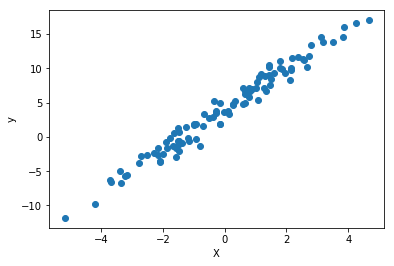

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

In [7]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# The Normal equation for finding theta hat, the global minima for the cost function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[ 4.04684371],
       [ 2.99333501]])

The formula is y = 4 + 3 x0 + Gaussian noise. So theta hat is very close.

In [10]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[ 1.  0.]
 [ 1.  2.]]
[[  4.04684371]
 [ 10.03351373]]


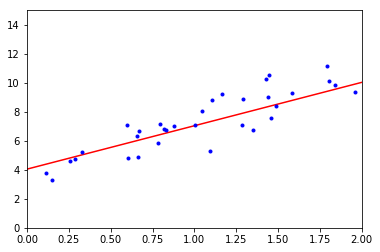

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.04684371]), array([[ 2.99333501]]))

In [14]:
lin_reg.predict(X_new)

array([[  4.04684371],
       [ 10.03351373]])

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.04684371],
       [ 2.99333501]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.0729814]), array([ 3.02690726]))

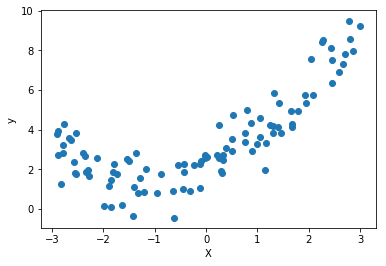

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.61741064]
[-2.61741064  6.85083847]


In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.13245832]), array([[ 1.03938479,  0.45982631]]))

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, 5])

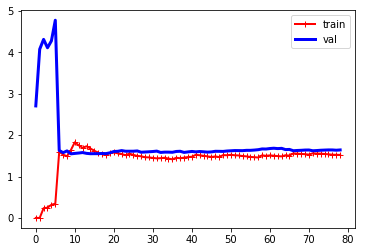

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

The smaller the dataset size, the more the model will overfit the data. The bigger the dataset size, the better the validation error and generalisation of the model.

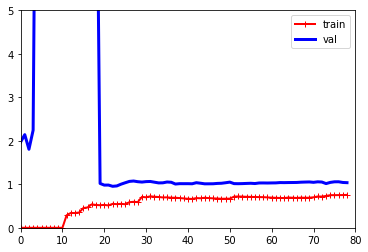

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

This 10 degree polynomial model overfits the perfectly for the first 10 datum (which make sense since it is a 10 degree polynomial) and then it's performance drops 

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.91808179]])

In [49]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 3.94615788])

[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48
  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6
  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72
  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84
  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96
  0.97  0.98  0.99]


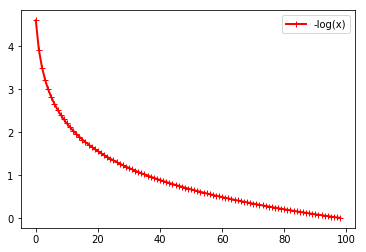

In [61]:
X1 = np.arange(0.01, 1, 0.01)
print(X1)
y1 = -np.log(X1)

plt.plot(y1, "r-+", linewidth=2, label="-log(x)")
plt.legend(loc="upper right")

In [62]:
print(-np.log(1))

-0.0


In [63]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'feature_names', 'target_names', 'DESCR']

In [65]:
pedal_width_index = 3
X = iris["data"][:, pedal_width_index:]
iris_virginica_target = 2
y = (iris["target"] == iris_virginica_target).astype(np.int)

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

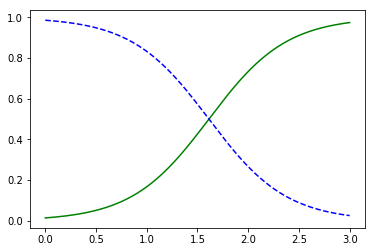

In [71]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [73]:
log_reg.predict([[1.7], [1.6], [1.5]])

array([1, 0, 0])

In [78]:
attributes = (2, 3) # petal length, petal width
X = iris["data"][:, attributes]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
softmax_reg.predict([[5, 2]])

array([2])

In [84]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])